In [2]:
import pandas as pd
traffic = pd.read_csv('Average_Daily_Traffic_Counts.csv')
pothole = pd.read_csv('Potholes_Patched.csv')
print(traffic)
print(pothole)

       ID  Traffic Volume Count Location  Address       Street Date of Count  \
0      414                              5838 West      Lake St    11/14/2006   
1      176                               320 East      76th St    03/28/2006   
2     1367                              1730 East      57th Dr    08/24/2006   
3      316                               125 East      24th St    03/30/2006   
4     1294                              2924 East     130th St    08/29/2006   
...    ...                                    ...          ...           ...   
1274   257                               256 East      35th St    03/29/2006   
1275   950                             2032 North   Pulaski Rd    10/05/2006   
1276   118                             6020 South   Halsted St    03/21/2006   
1277  1091                              3454 West  Franklin St    10/19/2006   
1278  1045                               316 West      51st St    10/19/2006   

      Total Passing Vehicle Volume  \
0

In [3]:
updatedPothole=pothole.dropna().reset_index(drop=True)
print(updatedPothole)

                      ADDRESS            REQUEST DATE         COMPLETION DATE  \
0          5505 W WINDSOR AVE  04/24/2019 02:06:04 PM  04/26/2019 02:05:16 PM   
1       7915 S WHIPPLE Street  10/12/2018 09:34:38 AM  04/26/2019 11:55:04 AM   
2          2200 N WESTERN AVE  02/09/2021 11:44:17 AM  02/15/2021 08:29:38 AM   
3           1811 N SAWYER AVE  01/26/2021 05:24:41 PM  02/15/2021 08:24:24 AM   
4           1804 N SAWYER AVE  01/26/2021 05:24:02 PM  02/15/2021 08:25:11 AM   
...                       ...                     ...                     ...   
121925     6412 N CENTRAL AVE  10/20/2022 11:06:03 AM  10/28/2022 07:38:48 AM   
121926      8600 W BERWYN AVE  10/28/2022 01:37:30 PM  10/28/2022 01:38:32 PM   
121927      714 S LA SALLE ST  10/28/2022 08:19:54 AM  10/28/2022 08:20:29 AM   
121928       200 N CLINTON ST  10/28/2022 08:23:33 AM  10/28/2022 08:24:04 AM   
121929           33 E 80TH ST  10/03/2022 06:20:40 PM  10/28/2022 02:27:23 PM   

        NUMBER OF POTHOLES 

In [4]:
updatedTraffic=traffic.dropna().reset_index(drop=True)
print(updatedTraffic)

extracted_col = updatedTraffic["Date of Count"]


       ID  Traffic Volume Count Location  Address       Street Date of Count  \
0      414                              5838 West      Lake St    11/14/2006   
1      176                               320 East      76th St    03/28/2006   
2     1367                              1730 East      57th Dr    08/24/2006   
3      316                               125 East      24th St    03/30/2006   
4     1294                              2924 East     130th St    08/29/2006   
...    ...                                    ...          ...           ...   
1274   257                               256 East      35th St    03/29/2006   
1275   950                             2032 North   Pulaski Rd    10/05/2006   
1276   118                             6020 South   Halsted St    03/21/2006   
1277  1091                              3454 West  Franklin St    10/19/2006   
1278  1045                               316 West      51st St    10/19/2006   

      Total Passing Vehicle Volume  \
0

In [5]:
updatedTraffic['Date of Count'] = pd.to_datetime(updatedTraffic['Date of Count'])
updatedTraffic.dtypes

ID                                                      int64
Traffic Volume Count Location  Address                 object
Street                                                 object
Date of Count                                  datetime64[ns]
Total Passing Vehicle Volume                            int64
Vehicle Volume By Each Direction of Traffic            object
Latitude                                              float64
Longitude                                             float64
Location                                               object
dtype: object

In [6]:
# Total Vechical that passed in chciago streets in year 2006 was 24897400.
updatedTraffic['Total Passing Vehicle Volume'].sum()


24897400

In [7]:
# Average Vechical passing daily in year 2006 was 19466.
updatedTraffic['Total Passing Vehicle Volume'].mean()


19466.301798279907

In [8]:
monthgroupby = updatedTraffic.groupby(updatedTraffic['Date of Count'].dt.month)['Total Passing Vehicle Volume'].sum()

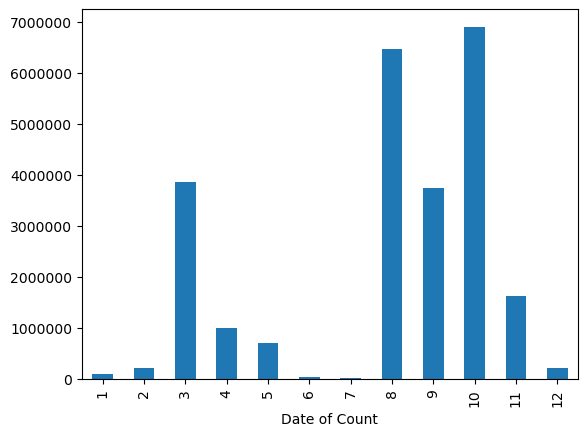

In [9]:
from matplotlib import pyplot as plt
# df['date'].dt.month_name().str[:3]
monthgroupby.plot(kind='bar', x='Date of Count', y='Total Passing Vehicle Volume')
plt.gca().ticklabel_format(axis='y', style='plain')

In [10]:
weeklygroupby = updatedTraffic.groupby(updatedTraffic['Date of Count'].dt.day)['Total Passing Vehicle Volume'].sum()

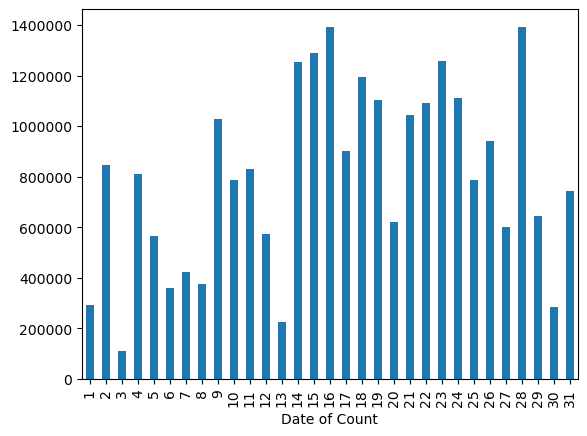

In [11]:
weeklygroupby.plot(kind='bar', x='Date of Count', y='Total Passing Vehicle Volume')
plt.gca().ticklabel_format(axis='y', style='plain')

In [12]:
groupbyAddress = updatedTraffic.groupby(updatedTraffic['Traffic Volume Count Location  Address'])['Total Passing Vehicle Volume'].sum()
groupbyAddress

Traffic Volume Count Location  Address
1 West         18800
10 East        51200
10 South       12100
10 West        13700
10040 South    11400
               ...  
9927 South      5300
9933 South     35700
9940 South      7300
9943 South     11900
996 South      22600
Name: Total Passing Vehicle Volume, Length: 1203, dtype: int64

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


sample_model = LinearRegression()

rfe = RFE(estimator=sample_model, n_features_to_select=2)
dummy_X = updatedTraffic.drop("Total Passing Vehicle Volume",1)
dummy_Y = updatedTraffic["Total Passing Vehicle Volume"] 
columns = list(dummy_X.columns)

X_rfe = rfe.fit_transform(dummy_X, dummy_Y)
sample_model.fit(X_rfe, dummy_Y)
temp = pd.Series(rfe.support_, index=columns)
two_features_rfe = temp[temp==True].index
print(two_features_rfe)
first_column = two_features_rfe[0]
second_column = two_features_rfe[1]

import numpy as np

X = pd.DataFrame(np.c_[df[first_column], df[second_column]], columns = two_features_rfe)
Y = updatedTraffic['Total Passing Vehicle Volume']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# TODO: Make predictions on test data 
y_test_predict = linear_model.predict(X_test)
y_train_predict = linear_model.predict(X_train)
for x in range(0, 10):
    print(x, y_test_predict[x], updatedTraffic['Total Passing Vehicle Volume'][x])
    

print(list(zip(X_train, linear_model.coef_)))

print((linear_model.intercept_))

# TODO: print the r-squared
r2 = r2_score(Y_test, y_test_predict)
print("R-Squared is", r2)

# TODO: print the mean squared error for training
mse_training = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("Mean squared error for training data set is", mse_training)

# TODO: print the mean squared error for testing
mse_testing = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("Mean squared error for testing data set is", mse_testing)



C:\Users\tapan\AppData\Local\Temp\ipykernel_1360\299250013.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy_X = updatedTraffic.drop("Total Passing Vehicle Volume",1)


ValueError: could not convert string to float: '5838 West'

In [14]:
updatedTraffic.index = updatedTraffic['Date of Count']
updatedTraffic = pd.DataFrame(updatedTraffic['Total Passing Vehicle Volume'])

# del updatedTraffic['Date of Count']
print(updatedTraffic.head())

               Total Passing Vehicle Volume
Date of Count                              
2006-11-14                             7100
2006-03-28                             8600
2006-08-24                            53500
2006-03-30                              700
2006-08-29                             4200


In [15]:
updatedTraffic = updatedTraffic.sort_index(axis=0)


Text(0, 0.5, 'Total Passing Vehicle')

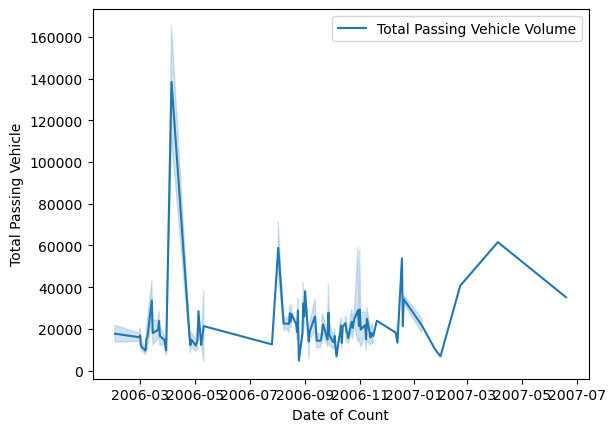

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(updatedTraffic)
plt.ylabel("Total Passing Vehicle")

In [17]:
type(updatedTraffic)
updatedTraffic.size
updatedTraffic.describe()


,Total Passing Vehicle Volume
count,1279.000000
mean,19466.301798
std,12448.378467
min,700.000000
25%,11350.000000
50%,17300.000000
75%,24200.000000
max,165200.000000


In [18]:
updatedTraffic_mean = updatedTraffic.rolling(window = 20).mean()


<AxesSubplot:xlabel='Date of Count'>

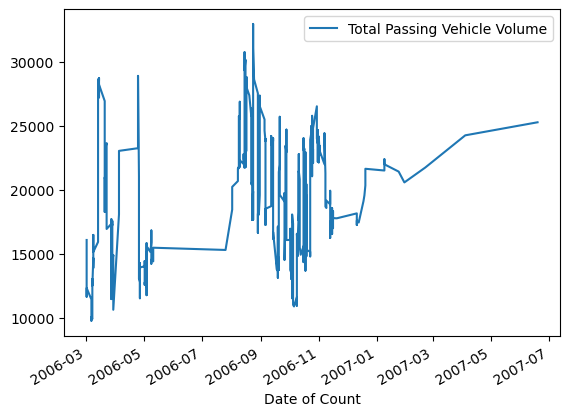

In [19]:
updatedTraffic_mean.plot() 

In [20]:
value = updatedTraffic.values
updatedValue = pd.DataFrame(value)

In [21]:
updatedTraffic_df = pd.concat([updatedValue, updatedValue.shift(1)], axis = 1)


In [22]:
updatedTraffic_df.head()

,0,0
0,21700,NaN
1,13700,21700.0
2,21600,13700.0
3,16700,21600.0
4,16500,16700.0


In [23]:
updatedTraffic_df.columns = ['Actual_Traffic_Volume', 'Predicted_Traffic_Volume']
updatedTraffic_df.head()

,Actual_Traffic_Volume,Predicted_Traffic_Volume
0,21700,NaN
1,13700,21700.0
2,21600,13700.0
3,16700,21600.0
4,16500,16700.0


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [25]:
updatedTraffic_test = updatedTraffic_df[1:]
updatedTraffic_test.head()

,Actual_Traffic_Volume,Predicted_Traffic_Volume
1,13700,21700.0
2,21600,13700.0
3,16700,21600.0
4,16500,16700.0
5,18200,16500.0


In [26]:
updatedTraffic_error = mean_squared_error(updatedTraffic_test.Actual_Traffic_Volume, updatedTraffic_test.Predicted_Traffic_Volume)

In [27]:
updatedTraffic_error

241246158.0594679

In [28]:
np.sqrt(updatedTraffic_error)

15532.100890074978

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

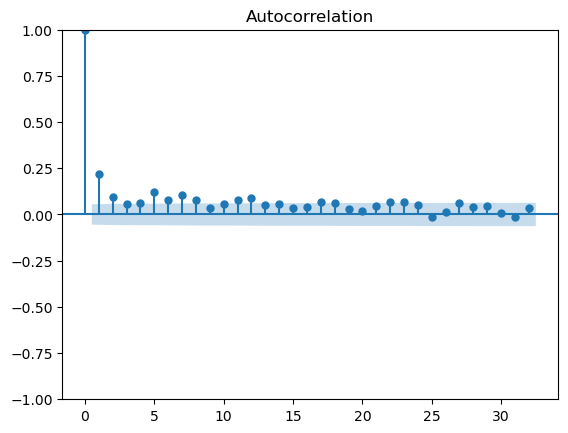

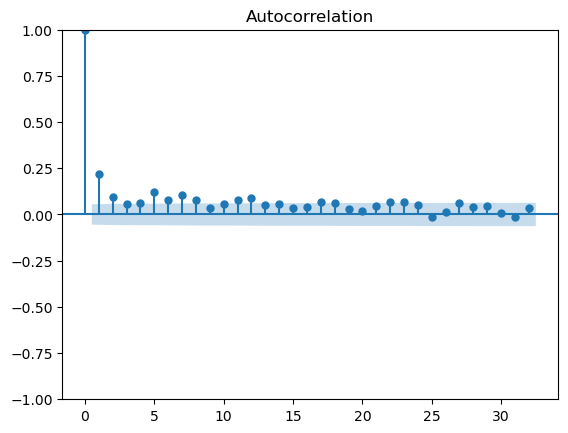

In [31]:
plot_acf(updatedTraffic_df['Actual_Traffic_Volume'])

C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


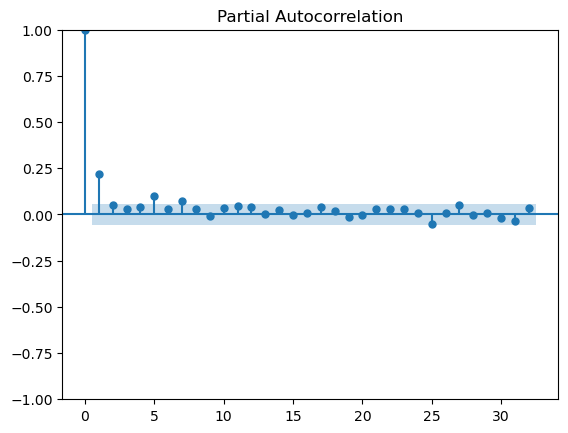

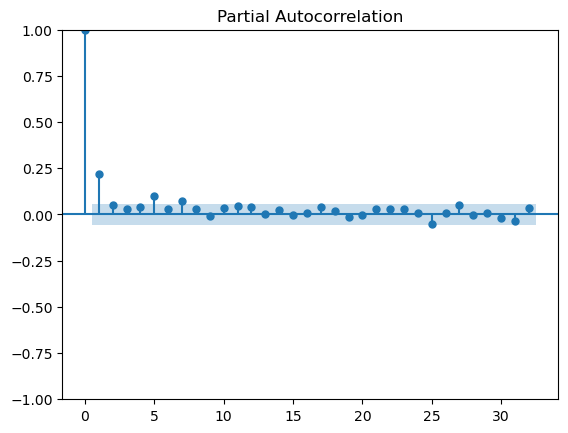

In [32]:
plot_pacf(updatedTraffic_df['Actual_Traffic_Volume'])

In [33]:
updatedTraffic_df['Actual_Traffic_Volume'].size

1279

In [34]:
updatedTraffic_train = updatedTraffic_df['Actual_Traffic_Volume'][0:1024]
updatedTraffic_test = updatedTraffic_df['Actual_Traffic_Volume'][1024:1279]

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
updatedTraffic_model = ARIMA(updatedTraffic_train, order=(2,0,3))

In [37]:
updatedTraffic_model_fit = updatedTraffic_model.fit()

In [38]:
updatedTraffic_model_fit.aic


22193.701687918583

In [39]:
updatedTraffic_prediction = updatedTraffic_model_fit.forecast(steps=255)
updatedTraffic_prediction


1024    17885.777746
1025    18268.113624
1026    18355.274302
1027    18352.644460
1028    18396.348346
            ...     
1274    19192.267424
1275    19192.274436
1276    19192.281216
1277    19192.287773
1278    19192.294115
Name: predicted_mean, Length: 255, dtype: float64

In [40]:
updatedTraffic_test

1024    11500
1025    16600
1026    10200
1027    11700
1028    11400
        ...  
1274    10200
1275     6900
1276    40700
1277    61600
1278    35200
Name: Actual_Traffic_Volume, Length: 255, dtype: int64

In [41]:
result = pd.concat([updatedTraffic_test, updatedTraffic_prediction], axis=1, join='inner')
result

,Actual_Traffic_Volume,predicted_mean
1024,11500,17885.777746
1025,16600,18268.113624
1026,10200,18355.274302
1027,11700,18352.644460
1028,11400,18396.348346
...,...,...
1274,10200,19192.267424
1275,6900,19192.274436
1276,40700,19192.281216
1277,61600,19192.287773


In [42]:
np.sqrt(mean_squared_error(updatedTraffic_test, updatedTraffic_prediction))

11238.580136308918

In [43]:
updatedTraffic_prediction[1278]

19192.294114876593

<AxesSubplot:>

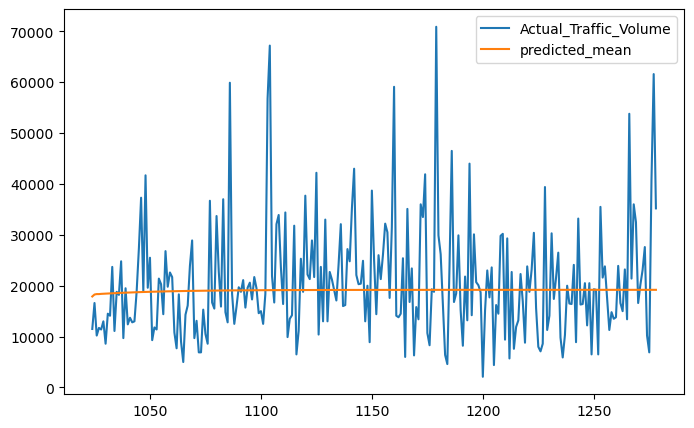

In [44]:
# updatedTraffic_prediction.plot()
# updatedTraffic_test.plot()
result[['Actual_Traffic_Volume', 'predicted_mean']].plot(figsize=(8, 5))


In [45]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(result['Actual_Traffic_Volume'], order = (2,1,2), seasonal_order = (2,1,2,30))
sar_result = model.fit()

C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\tapan\anaconda3\envs\geopandas\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

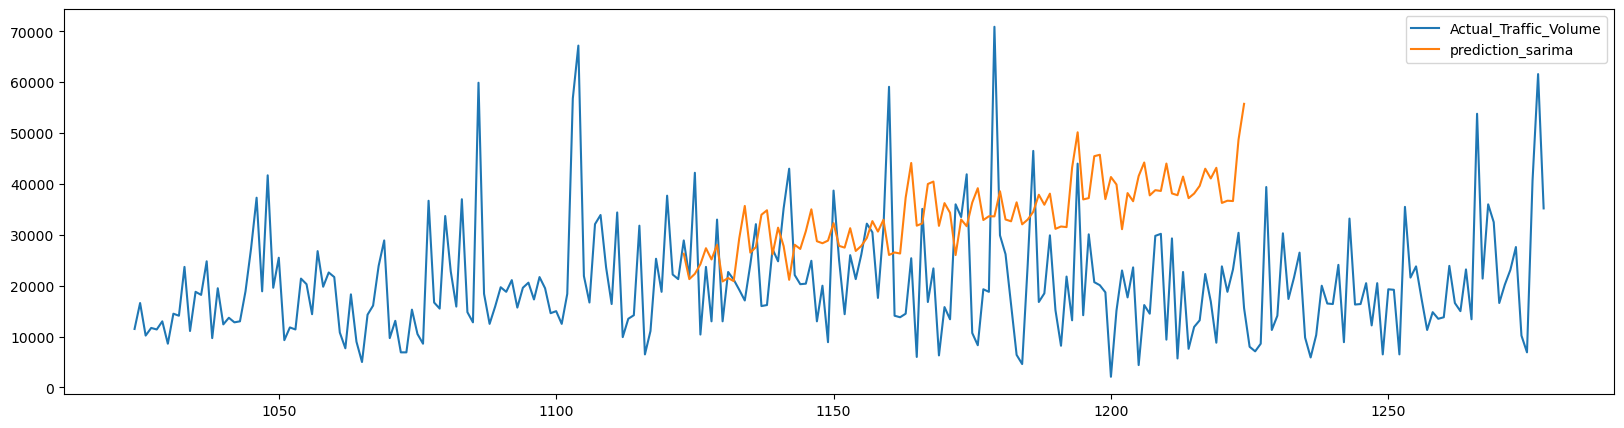

In [46]:
result['prediction_sarima'] = sar_result.predict(start=99, end=200, dynamic=True)
result[['Actual_Traffic_Volume', 'prediction_sarima']].plot(figsize=(20,5))

In [48]:
import datetime
from dateutil.relativedelta import relativedelta

start = 1279

index_list = [1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300]

future_prediction = pd.DataFrame(index=index_list, columns= result.columns)

future_prediction

result = pd.concat([result, future_prediction])
result


,Actual_Traffic_Volume,predicted_mean,prediction_sarima
1024,11500,17885.777746,NaN
1025,16600,18268.113624,NaN
1026,10200,18355.274302,NaN
1027,11700,18352.644460,NaN
1028,11400,18396.348346,NaN
...,...,...,...
1296,NaN,NaN,NaN
1297,NaN,NaN,NaN
1298,NaN,NaN,NaN
1299,NaN,NaN,NaN


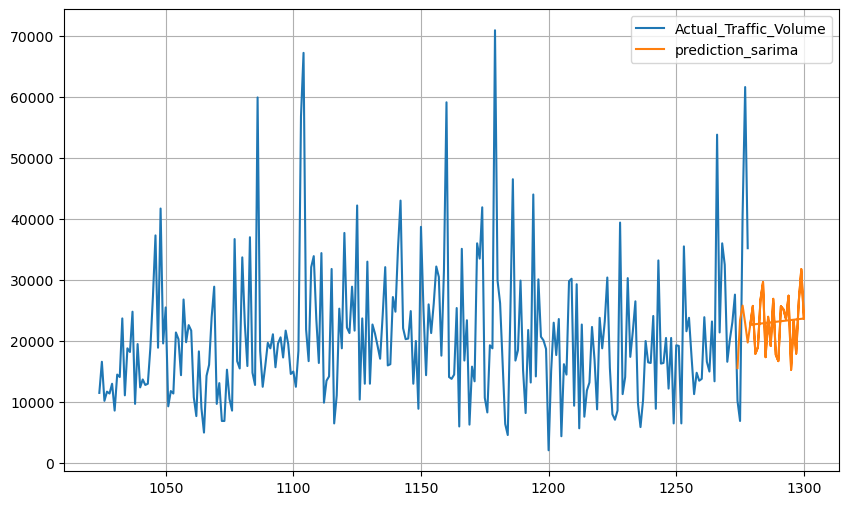

In [49]:
result['prediction_sarima'] = sar_result.predict(start=250, end=300, dynamic=True)
result[['Actual_Traffic_Volume','prediction_sarima']].plot(figsize=(10, 6))
plt.grid(True)